data exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Hackathon_Round_1.xlsx'  # Update with your file path
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the shape of the dataset (rows, columns)
print("\nShape of the dataset:")
print(df.shape)

# Display the columns in the dataset
print("\nColumns in the dataset:")
print(df.columns)

# Display data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values in the dataset
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Display unique values in the label column (assuming 'label' is the column name)
if 'label' in df.columns:
    print("\nUnique values in the label column:")
    print(df['label'].value_counts())

# Display the distribution of tweet lengths (assuming 'tweet_content' is the column name)
if 'tweet_content' in df.columns:
    df['tweet_length'] = df['tweet_content'].apply(lambda x: len(str(x)))
    print("\nDistribution of tweet lengths:")
    print(df['tweet_length'].describe())

# Visualize the distribution of labels (requires matplotlib and seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of labels
if 'label' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='label', palette='viridis')
    plt.title('Distribution of Labels')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

First few rows of the dataset:
                    ID                                               Text  \
0  1304930000000000000  even if you are ensconced in a pandemic pod wi...   
1  1303730000000000000  donald trump sacrificed thousands of americans...   
2  1303640000000000000  new coronavirus anger in china as doctor who d...   
3  1303220000000000000  is he joking  birmingham stabbings violent out...   
4  1303070000000000000  as soon as i saw this headline straight away i...   

                    User_Name subtask_a subtask_b  
0       J. Rodríguez, Ph.D.💥👀      CORO      COEM  
1             jhon ciabattari      CORO      COEM  
2  Shaun Dakin #ClimateAction      CORO      COEM  
3            Billy #Boom Kane      CORO      COEM  
4              Mr Jambon Fumé      CORO      COEM  

Shape of the dataset:
(71641, 5)

Columns in the dataset:
Index(['ID', 'Text', 'User_Name', 'subtask_a', 'subtask_b'], dtype='object')

Data types of each column:
ID            int64
Text      

datacleaning

In [ ]:
# Import necessary libraries
import pandas as pd
import re

# Load the dataset
file_path = 'Hackathon_Round_1.xlsx'  # Update with your file path
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Handle missing values (example: drop rows with missing tweet content)
missing_rows = df.isnull().sum().sum()  # Count total missing values
df.dropna(subset=['Text'], inplace=True)
print(f"\nDropped {missing_rows} rows due to missing tweet content.")

# Display the shape of the dataset after dropping missing values
print("\nShape of the dataset after dropping missing values:")
print(df.shape)

# Function to clean tweet content
def clean_tweet(tweet):
    # Ensure the tweet is a string
    if not isinstance(tweet, str):
        return ''
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove mentions (@usernames)
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags (optional, if you want to keep them, skip this line)
    # tweet = re.sub(r'#\w+', '', tweet)
    # Remove special characters and numbers
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    return tweet

# Apply the cleaning function to the tweet content
df['cleaned_tweet'] = df['Text'].apply(clean_tweet)

# Check for empty cleaned tweets
empty_tweets = df[df['cleaned_tweet'] == ''].shape[0]
if empty_tweets > 0:
    df.drop(df[df['cleaned_tweet'] == ''].index, inplace=True)
    print(f"\nDropped {empty_tweets} rows due to empty cleaned tweets.")

# Display the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df[['Text', 'cleaned_tweet']].head())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# Display the shape of the dataset after dropping duplicates
print("\nShape of the dataset after dropping duplicates:")
print(df.shape)

# Save the cleaned dataset to a new Excel file (optional)
cleaned_file_path = 'Cleaned_Hackathon_Round_1.xlsx'
df.to_excel(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")

First few rows of the dataset:
                    ID                                               Text  \
0  1304930000000000000  even if you are ensconced in a pandemic pod wi...   
1  1303730000000000000  donald trump sacrificed thousands of americans...   
2  1303640000000000000  new coronavirus anger in china as doctor who d...   
3  1303220000000000000  is he joking  birmingham stabbings violent out...   
4  1303070000000000000  as soon as i saw this headline straight away i...   

                    User_Name subtask_a subtask_b  
0       J. Rodríguez, Ph.D.💥👀      CORO      COEM  
1             jhon ciabattari      CORO      COEM  
2  Shaun Dakin #ClimateAction      CORO      COEM  
3            Billy #Boom Kane      CORO      COEM  
4              Mr Jambon Fumé      CORO      COEM  

Missing values in each column:
ID           0
Text         0
User_Name    0
subtask_a    0
subtask_b    0
dtype: int64

Dropped 0 rows due to missing tweet content.

Shape of the dataset after 

Data labelling

First few rows of the cleaned dataset:
                    ID                                               Text  \
0  1304930000000000000  even if you are ensconced in a pandemic pod wi...   
1  1303730000000000000  donald trump sacrificed thousands of americans...   
2  1303640000000000000  new coronavirus anger in china as doctor who d...   
3  1303220000000000000  is he joking  birmingham stabbings violent out...   
4  1303070000000000000  as soon as i saw this headline straight away i...   

                    User_Name subtask_a subtask_b  \
0       J. Rodríguez, Ph.D.💥👀      CORO      COEM   
1             jhon ciabattari      CORO      COEM   
2  Shaun Dakin #ClimateAction      CORO      COEM   
3            Billy #Boom Kane      CORO      COEM   
4              Mr Jambon Fumé      CORO      COEM   

                                       cleaned_tweet  
0  even if you are ensconced in a pandemic pod wi...  
1  donald trump sacrificed thousands of americans...  
2  new coronav

C:\Users\akash\AppData\Local\Temp\ipykernel_14312\2649083248.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subtask_a', palette='viridis')  # Updated column name


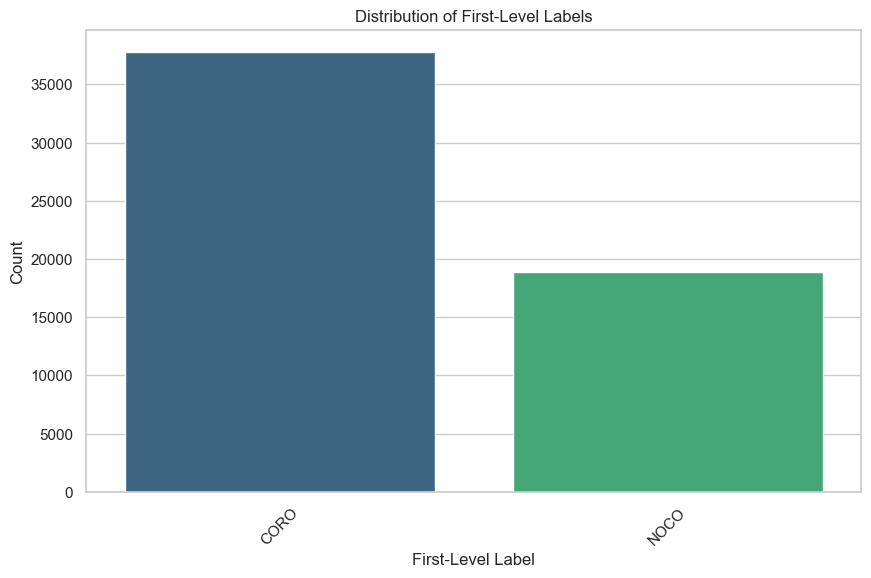


Unique values in the second-level label column:
subtask_b
CONE    18901
COEM    18893
NONE    10876
NOEM     8004
Name: count, dtype: int64


C:\Users\akash\AppData\Local\Temp\ipykernel_14312\2649083248.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subtask_b', palette='viridis')  # Updated column name


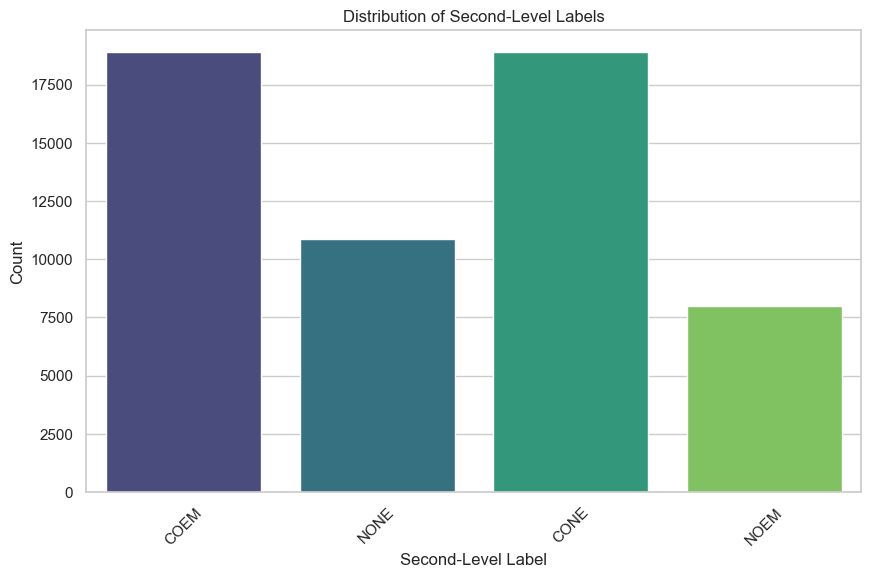

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'Cleaned_Hackathon_Round_1.xlsx'  # Update with your cleaned file path
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First few rows of the cleaned dataset:")
print(df.head())  # Added print statement to display the DataFrame

# Check the unique values in the first-level label column (assuming 'subtask_a' is the column name)
if 'subtask_a' in df.columns:
    print("\nUnique values in the first-level label column:")
    print(df['subtask_a'].value_counts())

    # Plot the distribution of first-level labels
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='subtask_a', palette='viridis')  # Updated column name
    plt.title('Distribution of First-Level Labels')
    plt.xlabel('First-Level Label')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Check the unique values in the second-level label column (assuming 'subtask_b' is the column name)
if 'subtask_b' in df.columns:
    print("\nUnique values in the second-level label column:")
    print(df['subtask_b'].value_counts())

    # Plot the distribution of second-level labels
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='subtask_b', palette='viridis')  # Updated column name
    plt.title('Distribution of Second-Level Labels')
    plt.xlabel('Second-Level Label')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Data preparation

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the cleaned dataset
file_path = 'Cleaned_Hackathon_Round_1.xlsx'  # Update with your cleaned file path
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First few rows of the cleaned dataset:")
print(df.head())

# Display all column names in the dataset
print("\nColumn names in the dataset:")
print(df.columns)

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check for necessary columns
if 'cleaned_tweet' in df.columns and 'subtask_a' in df.columns and 'subtask_b' in df.columns:
    # Prepare features and labels
    X = df['cleaned_tweet']  # Features (cleaned tweet text)
    y_first_level = df['subtask_a']  # First-level labels (CORO/Non-CORO)
    y_second_level = df['subtask_b']  # Second-level labels (COEM/Non-COEM)

    # Encode the labels (if they are categorical)
    label_encoder_first = LabelEncoder()
    y_first_level_encoded = label_encoder_first.fit_transform(y_first_level)

    label_encoder_second = LabelEncoder()
    y_second_level_encoded = label_encoder_second.fit_transform(y_second_level)

    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train_first, y_test_first, y_train_second, y_test_second = train_test_split(
        X, y_first_level_encoded, y_second_level_encoded, test_size=0.2, random_state=42
    )

    # Feature extraction using TF-IDF
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Display the shapes of the resulting datasets
    print("\nShapes of the datasets:")
    print(f"X_train shape: {X_train_tfidf.shape}")
    print(f"X_test shape: {X_test_tfidf.shape}")
    print(f"y_train_first shape: {y_train_first.shape}")
    print(f"y_test_first shape: {y_test_first.shape}")
    print(f"y_train_second shape: {y_train_second.shape}")
    print(f"y_test_second shape: {y_test_second.shape}")

else:
    print("Necessary columns are not present in the dataset.")

First few rows of the cleaned dataset:
                    ID                                               Text  \
0  1304930000000000000  even if you are ensconced in a pandemic pod wi...   
1  1303730000000000000  donald trump sacrificed thousands of americans...   
2  1303640000000000000  new coronavirus anger in china as doctor who d...   
3  1303220000000000000  is he joking  birmingham stabbings violent out...   
4  1303070000000000000  as soon as i saw this headline straight away i...   

                    User_Name subtask_a subtask_b  \
0       J. Rodríguez, Ph.D.💥👀      CORO      COEM   
1             jhon ciabattari      CORO      COEM   
2  Shaun Dakin #ClimateAction      CORO      COEM   
3            Billy #Boom Kane      CORO      COEM   
4              Mr Jambon Fumé      CORO      COEM   

                                       cleaned_tweet  
0  even if you are ensconced in a pandemic pod wi...  
1  donald trump sacrificed thousands of americans...  
2  new coronav

feature extraction

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the cleaned dataset
file_path = 'Cleaned_Hackathon_Round_1.xlsx'  # Update with your cleaned file path
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First few rows of the cleaned dataset:")
print(df.head())

# Check if the cleaned_tweet column is present
if 'cleaned_tweet' in df.columns:
    # Prepare features (cleaned tweet text)
    X = df['cleaned_tweet']

    # Feature extraction using TF-IDF
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
    X_tfidf = tfidf_vectorizer.fit_transform(X)

    # Convert the TF-IDF matrix to a DataFrame for better visualization
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    # Display the shape of the TF-IDF matrix
    print("\nShape of the TF-IDF matrix:")
    print(X_tfidf.shape)

    # Display the first few rows of the TF-IDF DataFrame
    print("\nFirst few rows of the TF-IDF DataFrame:")
    print(X_tfidf_df.head())

    # Check for necessary label columns
    if 'subtask_a' in df.columns and 'subtask_b' in df.columns:
        print("\nUnique values in the first-level label column (subtask_a):")
        print(df['subtask_a'].value_counts())

        print("\nUnique values in the second-level label column (subtask_b):")
        print(df['subtask_b'].value_counts())
    else:
        print("Necessary label columns are not present in the dataset.")

else:
    print("The 'cleaned_tweet' column is not present in the dataset.")

First few rows of the cleaned dataset:
                    ID                                               Text  \
0  1304930000000000000  even if you are ensconced in a pandemic pod wi...   
1  1303730000000000000  donald trump sacrificed thousands of americans...   
2  1303640000000000000  new coronavirus anger in china as doctor who d...   
3  1303220000000000000  is he joking  birmingham stabbings violent out...   
4  1303070000000000000  as soon as i saw this headline straight away i...   

                    User_Name subtask_a subtask_b  \
0       J. Rodríguez, Ph.D.💥👀      CORO      COEM   
1             jhon ciabattari      CORO      COEM   
2  Shaun Dakin #ClimateAction      CORO      COEM   
3            Billy #Boom Kane      CORO      COEM   
4              Mr Jambon Fumé      CORO      COEM   

                                       cleaned_tweet  
0  even if you are ensconced in a pandemic pod wi...  
1  donald trump sacrificed thousands of americans...  
2  new coronav

model selection

First few rows of the cleaned dataset:
                    ID                                               Text  \
0  1304930000000000000  even if you are ensconced in a pandemic pod wi...   
1  1303730000000000000  donald trump sacrificed thousands of americans...   
2  1303640000000000000  new coronavirus anger in china as doctor who d...   
3  1303220000000000000  is he joking  birmingham stabbings violent out...   
4  1303070000000000000  as soon as i saw this headline straight away i...   

                    User_Name subtask_a subtask_b  \
0       J. Rodríguez, Ph.D.💥👀      CORO      COEM   
1             jhon ciabattari      CORO      COEM   
2  Shaun Dakin #ClimateAction      CORO      COEM   
3            Billy #Boom Kane      CORO      COEM   
4              Mr Jambon Fumé      CORO      COEM   

                                       cleaned_tweet  
0  even if you are ensconced in a pandemic pod wi...  
1  donald trump sacrificed thousands of americans...  
2  new coronav

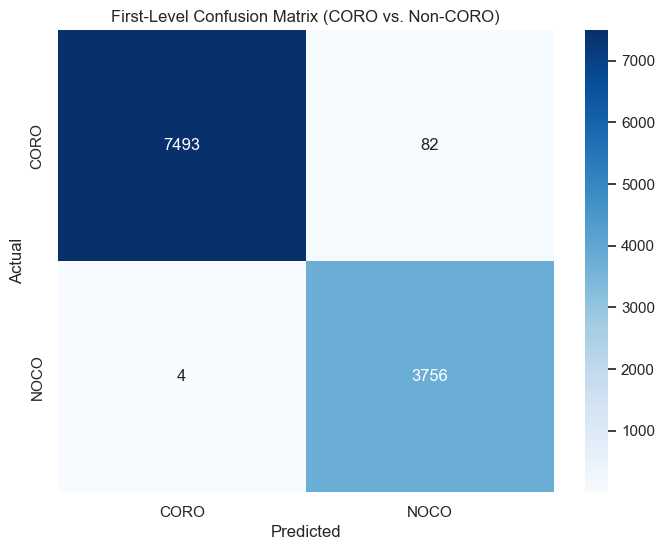


Second-Level Classification (COEM vs. Non-COEM):
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.9482

Classification Report:
              precision    recall  f1-score   support

        COEM       0.96      0.94      0.95      3729
        CONE       0.95      0.95      0.95      3846
        NOEM       0.94      0.93      0.94      1580
        NONE       0.93      0.97      0.95      2180

    accuracy                           0.95     11335
   macro avg       0.94      0.95      0.95     11335
weighted avg       0.95      0.95      0.95     11335



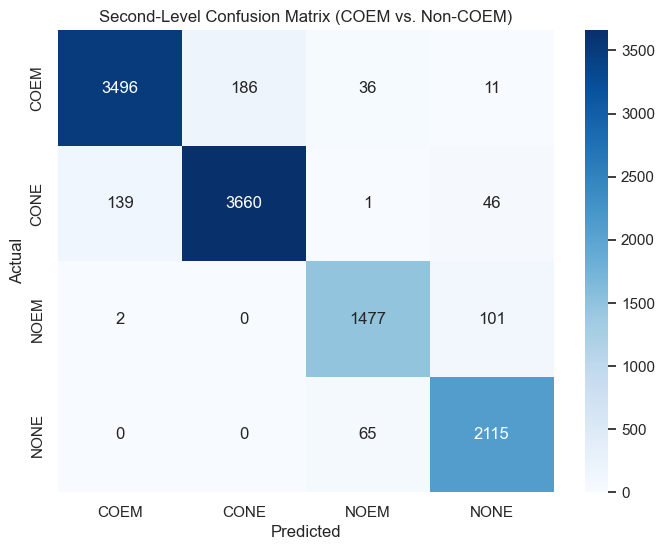

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'Cleaned_Hackathon_Round_1.xlsx'  # Update with your file path
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First few rows of the cleaned dataset:")
print(df.head())

# Check if necessary columns exist
if 'cleaned_tweet' in df.columns and 'subtask_a' in df.columns and 'subtask_b' in df.columns:
    # Prepare features (TF-IDF)
    X = df['cleaned_tweet']
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X_tfidf = tfidf_vectorizer.fit_transform(X)

    # Encode labels (convert CORO/Non-CORO and COEM/Non-COEM to numerical values)
    label_encoder_first = LabelEncoder()
    y_first = label_encoder_first.fit_transform(df['subtask_a'])  # CORO/Non-CORO

    label_encoder_second = LabelEncoder()
    y_second = label_encoder_second.fit_transform(df['subtask_b'])  # COEM/Non-COEM

    # Split the dataset into training and testing sets
    X_train_tfidf, X_test_tfidf, y_train_first, y_test_first, y_train_second, y_test_second = train_test_split(
        X_tfidf, y_first, y_second, test_size=0.2, random_state=42
    )

    # Define hyperparameter grid for Logistic Regression
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }

    # ----------------------------
    # FIRST-LEVEL CLASSIFICATION (CORO vs. Non-CORO)
    # ----------------------------
    print("\nFirst-Level Classification (CORO vs. Non-CORO):")

    # Hyperparameter tuning
    lr_first = LogisticRegression(max_iter=1000)
    grid_search_first = GridSearchCV(lr_first, param_grid, cv=5, scoring='accuracy')
    grid_search_first.fit(X_train_tfidf, y_train_first)

    # Best model and predictions
    best_lr_first = grid_search_first.best_estimator_
    y_pred_first = best_lr_first.predict(X_test_tfidf)

    # Evaluation
    print(f"Best Parameters: {grid_search_first.best_params_}")
    print(f"Test Accuracy: {accuracy_score(y_test_first, y_pred_first):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_first, y_pred_first, 
                                  target_names=label_encoder_first.classes_))  # Auto-map class names

    # Confusion Matrix
    cm_first = confusion_matrix(y_test_first, y_pred_first)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_first, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder_first.classes_,
                yticklabels=label_encoder_first.classes_)
    plt.title('First-Level Confusion Matrix (CORO vs. Non-CORO)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ----------------------------
    # SECOND-LEVEL CLASSIFICATION (COEM vs. Non-COEM)
    # ----------------------------
    print("\nSecond-Level Classification (COEM vs. Non-COEM):")

    # Hyperparameter tuning
    lr_second = LogisticRegression(max_iter=1000)
    grid_search_second = GridSearchCV(lr_second, param_grid, cv=5, scoring='accuracy')
    grid_search_second.fit(X_train_tfidf, y_train_second)

    # Best model and predictions
    best_lr_second = grid_search_second.best_estimator_
    y_pred_second = best_lr_second.predict(X_test_tfidf)

    # Evaluation
    print(f"Best Parameters: {grid_search_second.best_params_}")
    print(f"Test Accuracy: {accuracy_score(y_test_second, y_pred_second):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_second, y_pred_second,
                                target_names=label_encoder_second.classes_))  # Auto-map class names

    # Confusion Matrix
    cm_second = confusion_matrix(y_test_second, y_pred_second)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_second, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder_second.classes_,
                yticklabels=label_encoder_second.classes_)
    plt.title('Second-Level Confusion Matrix (COEM vs. Non-COEM)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

else:
    print("Error: Required columns ('cleaned_tweet', 'subtask_a', 'subtask_b') not found in the dataset.")

output

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the cleaned dataset
file_path = 'Cleaned_Hackathon_Round_1.xlsx'  # Update with your file path
df = pd.read_excel(file_path)

# Prepare features (TF-IDF)
X = df['cleaned_tweet']
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Encode labels for both levels
label_encoder_first = LabelEncoder()
y_first = label_encoder_first.fit_transform(df['subtask_a'])  # First-level labels (CORO/Non-CORO)

label_encoder_second = LabelEncoder()
y_second = label_encoder_second.fit_transform(df['subtask_b'])  # Second-level labels (COEM/Non-COEM)

# Train the models
lr_first = LogisticRegression(max_iter=1000)
lr_first.fit(X_tfidf, y_first)

lr_second = LogisticRegression(max_iter=1000)
lr_second.fit(X_tfidf, y_second)

# Save the models and components
joblib.dump(lr_first, 'logistic_regression_model_first.pkl')
joblib.dump(lr_second, 'logistic_regression_model_second.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder_first, 'label_encoder_first.pkl')
joblib.dump(label_encoder_second, 'label_encoder_second.pkl')

# Function to make predictions for both levels
def predict_tweet(tweet):
    # Load models, vectorizer, and encoders
    model_first = joblib.load('logistic_regression_model_first.pkl')
    model_second = joblib.load('logistic_regression_model_second.pkl')
    vectorizer = joblib.load('tfidf_vectorizer.pkl')
    label_encoder_first = joblib.load('label_encoder_first.pkl')
    label_encoder_second = joblib.load('label_encoder_second.pkl')

    # Transform the input tweet
    tweet_tfidf = vectorizer.transform([tweet])
    
    # Predict first-level
    prediction_first = model_first.predict(tweet_tfidf)
    predicted_first = label_encoder_first.inverse_transform(prediction_first)[0]
    
    # Predict second-level
    prediction_second = model_second.predict(tweet_tfidf)
    predicted_second = label_encoder_second.inverse_transform(prediction_second)[0]
    
    return predicted_first, predicted_second

# Command-line interface for predictions
if __name__ == "__main__":
    print("Welcome to the Tweet Classification CLI!")
    print("Type 'exit' to quit.")
    
    while True:
        user_input = input("Enter a tweet to classify: ")
        if user_input.lower() == 'exit':
            print("Exiting the program.")
            break
        
        # Get predictions for both levels
        result_first, result_second = predict_tweet(user_input)
        print(f"First-Level Prediction (CORO/Non-CORO): {result_first}")
        print(f"Second-Level Prediction (COEM/Non-COEM): {result_second}\n")

Welcome to the Tweet Classification CLI!
Type 'exit' to quit.
First-Level Prediction (CORO/Non-CORO): CORO
Second-Level Prediction (COEM/Non-COEM): COEM

Exiting the program.
